<a href="https://colab.research.google.com/github/Giraldo0712/TAM_2025_2/blob/main/IntroduccionDL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ejercicio:

- Configure el entorno de Colab para trabajar con GPU (Ver pestaña entorno de ejecución). Repita el entrenamiento del modelo de clasificación Fashion mnist para batch size en 32, 64, 128, 256, y 512. Reporte una tabla con los rendimientos sobre el conjunto de test y el tiempo promedio de cómputo por época.

- Repita el procedimiento del punto anterior configurando Colab para trabajar con TPU.

In [16]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time


In [17]:
fashion_mnist = keras.datasets.fashion_mnist #cargar fashion mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [18]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

In [19]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
class_names[y_train[0]]

'Coat'

In [20]:
def entrenar_y_evaluar(batch_size):
    # Limpiar sesión y fijar semillas
    keras.backend.clear_session()
    np.random.seed(42)
    tf.random.set_seed(42)

    # Definir modelo
    model = keras.models.Sequential([
        keras.layers.Flatten(input_shape=[28, 28]),
        keras.layers.Dense(300, activation="relu"),
        keras.layers.Dense(100, activation="relu"),
        keras.layers.Dense(10, activation="softmax")
    ])

    model.compile(loss="sparse_categorical_crossentropy",
                  optimizer="sgd",
                  metrics=["accuracy"])

    # Medir tiempo de entrenamiento
    inicio = time.time()
    history = model.fit(X_train, y_train, epochs=10,
                        batch_size=batch_size,
                        validation_data=(X_valid, y_valid),
                        verbose=0)
    fin = time.time()

    # Evaluar en test
    test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)

    # Tiempo promedio por época
    tiempo_promedio = (fin - inicio) / 10

    # Retornar métricas y el historial
    return test_acc, tiempo_promedio, history


In [21]:
batch_sizes = [32, 64, 128, 256, 512]
resultados = {}

for b in batch_sizes:
    print(f"Entrenando con batch_size = {b}...")
    acc, tiempo, history = entrenar_y_evaluar(b)
    resultados[b] = {"accuracy": acc, "tiempo": tiempo, "history": history}


Entrenando con batch_size = 32...


/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Entrenando con batch_size = 64...
Entrenando con batch_size = 128...
Entrenando con batch_size = 256...
Entrenando con batch_size = 512...


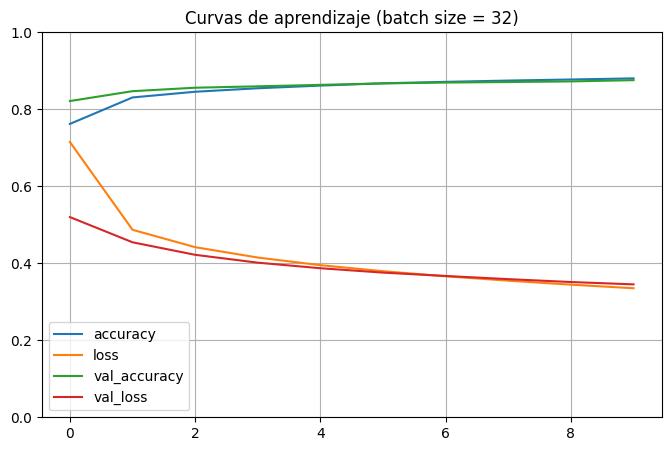

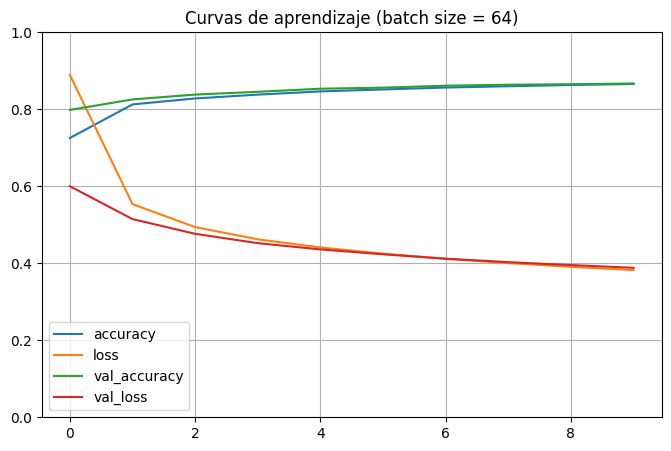

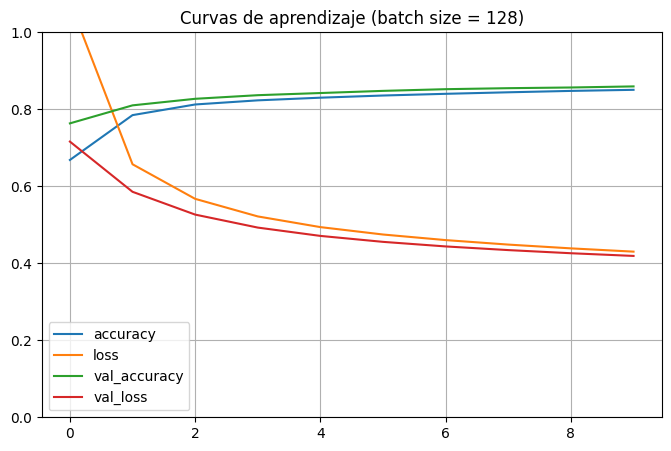

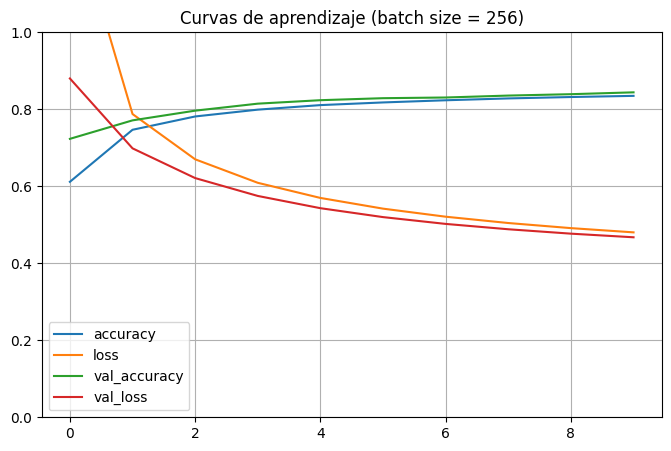

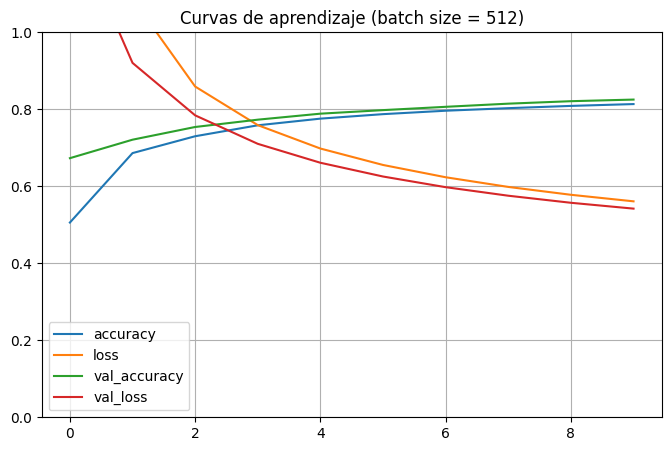

In [22]:
for b in batch_sizes:
    pd.DataFrame(resultados[b]["history"].history).plot(figsize=(8,5))
    plt.grid(True)
    plt.gca().set_ylim(0, 1)
    plt.title(f"Curvas de aprendizaje (batch size = {b})")
    plt.show()


In [23]:
tabla = pd.DataFrame(
    [[b, resultados[b]["accuracy"], resultados[b]["tiempo"]] for b in batch_sizes],
    columns=["Batch Size", "Accuracy (Test)", "Tiempo Promedio por Época (s)"]
)
print(tabla)


   Batch Size  Accuracy (Test)  Tiempo Promedio por Época (s)
0          32           0.8627                       4.681338
1          64           0.8451                       2.327242
2         128           0.8411                       1.349826
3         256           0.8265                       0.848841
4         512           0.8012                       0.643363


#TPU

In [3]:
!pip install -q tensorflow


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 620.7/620.7 MB 799.0 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 67.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 77.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 84.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 19.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.5/72.5 kB 5.7 MB/s eta 0:00:00


In [6]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time

fashion_mnist = keras.datasets.fashion_mnist #cargar fashion mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [7]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

In [8]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
class_names[y_train[0]]

'Coat'

In [9]:
def entrenar_y_evaluar_tpu(batch_size):
    import numpy as np
    keras = tf.keras
    keras.backend.clear_session()
    np.random.seed(42)
    tf.random.set_seed(42)

    # Modelo dentro del scope TPU
    model = keras.models.Sequential([
        keras.layers.Flatten(input_shape=[28, 28]),
        keras.layers.Dense(300, activation="relu"),
        keras.layers.Dense(100, activation="relu"),
        keras.layers.Dense(10, activation="softmax")
    ])

    model.compile(loss="sparse_categorical_crossentropy",
        optimizer="sgd",
        metrics=["accuracy"])

    # Entrenamiento
    inicio = time.time()
    history = model.fit(X_train, y_train, epochs=10,
                        batch_size=batch_size,
                        validation_data=(X_valid, y_valid),
                        verbose=0)
    fin = time.time()

    # Evaluación
    test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
    tiempo_promedio = (fin - inicio) / 10

    return test_acc, tiempo_promedio, history


In [10]:
batch_sizes = [32, 64, 128, 256, 512]
resultados_tpu = {}

for b in batch_sizes:
    print(f"Entrenando con TPU - batch_size = {b}...")
    acc, tiempo, history = entrenar_y_evaluar_tpu(b)
    resultados_tpu[b] = {"accuracy": acc, "tiempo": tiempo, "history": history}


Entrenando con TPU - batch_size = 32...


/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Entrenando con TPU - batch_size = 64...
Entrenando con TPU - batch_size = 128...
Entrenando con TPU - batch_size = 256...
Entrenando con TPU - batch_size = 512...


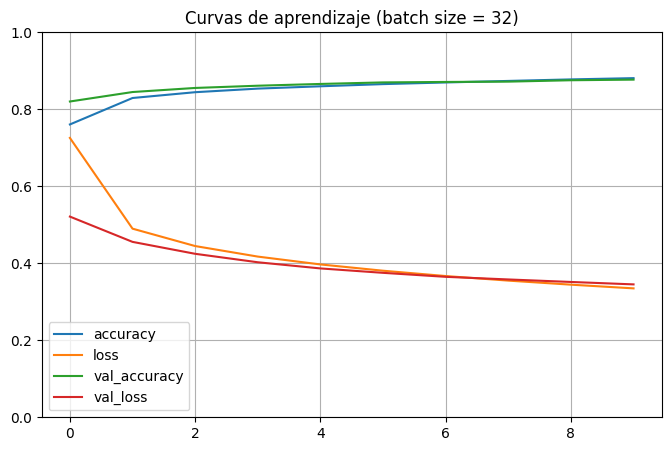

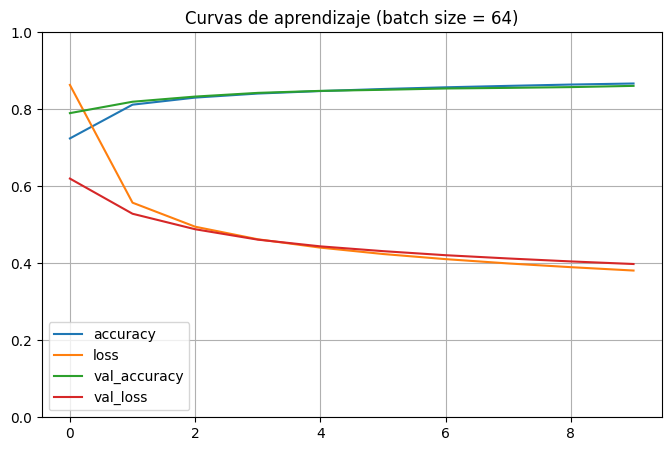

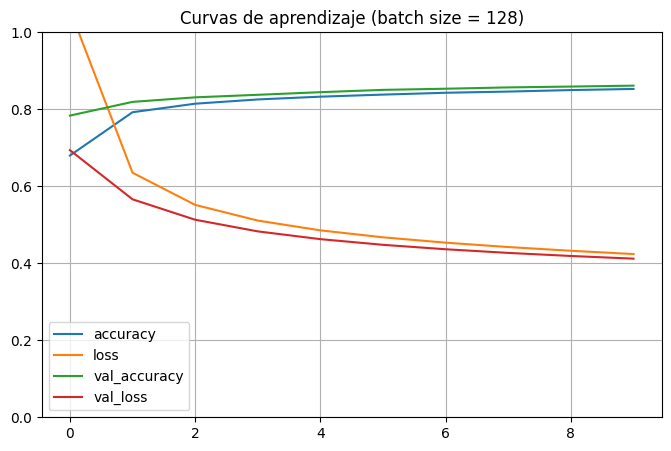

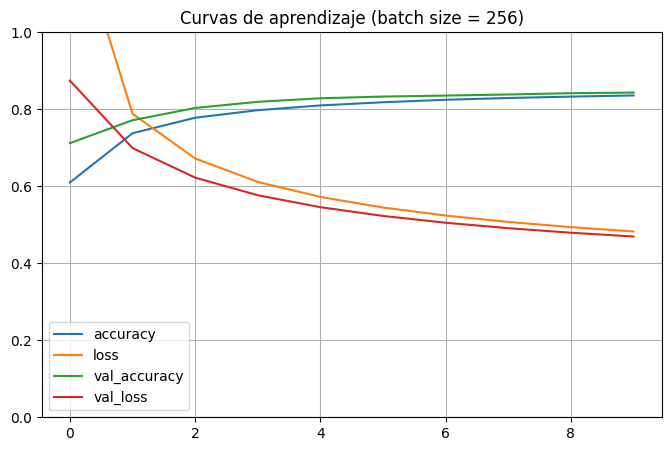

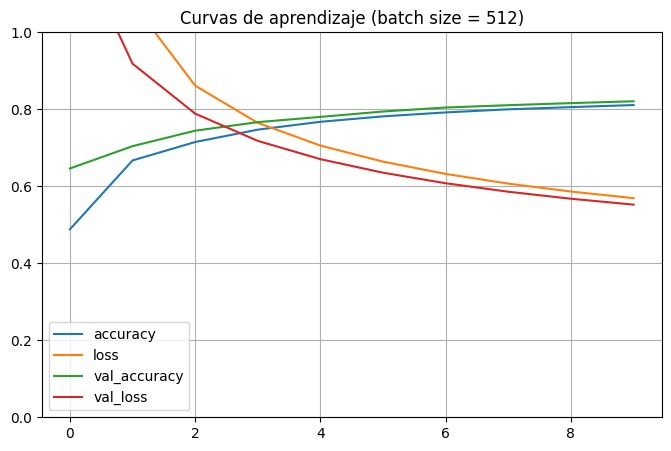

In [13]:
for b in batch_sizes:
    pd.DataFrame(resultados_tpu[b]["history"].history).plot(figsize=(8,5))
    plt.grid(True)
    plt.gca().set_ylim(0, 1)
    plt.title(f"Curvas de aprendizaje (batch size = {b})")
    plt.show()


In [15]:
tabla_comparativa = pd.DataFrame({
    "Batch Size": batch_sizes,
    "Accuracy TPU": [resultados_tpu[b]["accuracy"] for b in batch_sizes],
    "Tiempo TPU (s/época)": [resultados_tpu[b]["tiempo"] for b in batch_sizes],
})

print(tabla_comparativa)


   Batch Size  Accuracy TPU  Tiempo TPU (s/época)
0          32        0.8603              2.514803
1          64        0.8448              1.461824
2         128        0.8400              1.086161
3         256        0.8251              0.851334
4         512        0.8032              0.749328
